# 📘 Understanding Linear Regression from Scratch

## 📌 1. Introduction to Linear Regression

Linear Regression predicts a continuous target variable $y$ based on input features $X$. The equation is:

$$
y = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b
$$

or in vectorized form:

$$
\mathbf{y} = \mathbf{X} \mathbf{w} + b
$$

**Where:**  
- $ \mathbf{X} $ is the input feature matrix.  
- $ \mathbf{w} $ is the weight vector.  
- $ b $ is the bias term.  
- $ \mathbf{y} $ is the target variable.  

---

## 📌 2. Cost Function (Mean Squared Error)

To measure model performance, we use **Mean Squared Error (MSE)**:

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

**Where:**  
- $ y_i $ is the actual value.  
- $ \hat{y}_i $ is the predicted value.  
- $ m $ is the number of samples.  

---

## 📌 3. Gradient Descent Optimization

### **Step 1: Compute Predictions**
Predicted values are:

$$
\hat{y} = \mathbf{X} \mathbf{w} + b
$$

### **Step 2: Compute Gradients**
The gradients w.r.t. $w$ and $b$ are:

$$
\frac{\partial MSE}{\partial w} = \frac{2}{m} \mathbf{X}^T (\mathbf{X} \mathbf{w} + b - \mathbf{y})
$$

$$
\frac{\partial MSE}{\partial b} = \frac{2}{m} \sum (\mathbf{X} \mathbf{w} + b - \mathbf{y})
$$

**Where:**  
- $ \mathbf{X}^T $ is the transpose of $ \mathbf{X} $.  
- $ \mathbf{X} \mathbf{w} $ is the predicted output.  

### **Step 3: Update Parameters**
Using the learning rate $ \alpha $:

$$
w := w - \alpha \cdot \frac{\partial MSE}{\partial w}
$$

$$
b := b - \alpha \cdot \frac{\partial MSE}{\partial b}
$$

---

## 📌 4. Closed-Form Solution (Normal Equation)

Instead of iterative optimization, the **Normal Equation** computes optimal weights:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

$$
b = \mathbf{w}_0
$$

**Where:**  
- $ (\mathbf{X}^T \mathbf{X})^{-1} $ is the inverse of $ \mathbf{X}^T \mathbf{X} $.  
- $ \mathbf{X}^T \mathbf{y} $ is the dot product of $ \mathbf{X}^T $ and $ \mathbf{y} $.  

---

## 📌 5. Model Evaluation Metrics

### **5.1 Mean Squared Error (MSE)**
$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

### **5.2 R² Score (Coefficient of Determination)**
$$
R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
$$

**Where:**  
- $ \bar{y} $ is the mean of $ y $.  
- $ R^2 $ measures how well the model explains variance in $ y $.  

---

## 📌 6. Data Visualization Methods

### **6.1 Loss Curve**
To visualize **Gradient Descent**, we plot loss over iterations.

$$
\text{Loss} = MSE
$$

### **6.2 Actual vs. Predicted Values**
A scatter plot is used to compare **predicted vs actual values**. A perfect model has points on the line $ y = x $.

### **6.3 Residuals Plot**
Residuals ($ y - \hat{y} $) should be randomly distributed around zero.

---

## 📌 7. Conclusion

- **Gradient Descent** iteratively optimizes weights.  
- **Normal Equation** computes weights directly but is inefficient for large datasets.  
- **MSE and R² Score** measure performance.  
- **Loss curves and residual plots** help visualize model behavior.  

Linear Regression remains a **powerful yet simple** algorithm. 🚀


In [74]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    """Linear Regression Model supporting Gradient Descent and Closed-Form Solution."""
    
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _mse(self, y, y_pred):
        """Compute Mean Squared Error (MSE)."""
        return np.mean((y - y_pred) ** 2)

    def fit(self, X, y):
        """Train the model using Gradient Descent."""
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = np.zeros((1, 1))

        # Gradient Descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute and store loss
            loss = self._mse(y, y_predicted)
            self.loss_history.append(loss)

    def closed_form_solution(self, X, y):
        """Compute the closed-form solution using the Normal Equation."""
        n_samples = X.shape[0]

        # Add bias column (column of ones)
        X_b = np.c_[np.ones((n_samples, 1)), X]

        # Compute (X^T X)^(-1) X^T y
        w_closed = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        # Extract bias and weights
        self.bias = w_closed[0]  # First element is bias
        self.weights = w_closed[1:]  # Remaining are weights

    def predict(self, X):
        """Make predictions using the trained model."""
        return np.dot(X, self.weights) + self.bias

In [75]:
class RegressionUtils:
    """Utility class for regression models: evaluation metrics and visualization."""
    
    @staticmethod
    def mean_squared_error(y, y_pred):
        """Compute Mean Squared Error (MSE)."""
        return np.mean((y - y_pred) ** 2)

    @staticmethod
    def r2_score(y, y_pred):
        """Compute R² Score."""
        y_true = y.flatten()
        y_pred = y_pred.flatten()
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    @staticmethod
    def plot_loss(loss_history):
        """Plot the loss over iterations."""
        plt.plot(loss_history)
        plt.title('Loss over Gradient Descent')
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.grid(True)
        plt.show()

    @staticmethod
    def plot_predictions(model, X, y):
        """Scatter plot of actual vs. predicted values, with a perfect prediction line."""
        y_pred = model.predict(X)

        # Create a perfect prediction line (y = x)
        x_line = np.linspace(y.min(), y.max(), 100)

        # Scatter plot of predicted vs. actual values
        plt.scatter(y_pred, y, color='blue', marker='x', s=20, label='Predicted vs Actual')
        plt.plot(x_line, x_line, linestyle='-', color='red', label='Perfect Prediction')

        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.title('Actual vs. Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Compute correlation coefficient safely
        if np.std(y_pred) == 0 or np.std(y) == 0:
            correlation = 0
        else:
            correlation = np.corrcoef(y_pred.flatten(), y.flatten())[0, 1]
        
        print(f"Prediction Correlation: {correlation:.4f}")

    @staticmethod
    def plot_residuals(model, X, y):
        """Plot residuals vs. predicted values."""
        y_pred = model.predict(X)
        residuals = y - y_pred

        # Scatter plot of residuals vs. predicted values
        plt.scatter(y_pred, residuals, color='blue', marker='x', s=20, label='Residuals')
        plt.axhline(y=0, color='red', linestyle='-', label='Zero Residual Line')

        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title("Residuals vs. Predicted Values")
        plt.legend()
        plt.grid(True)
        plt.show()

Linear Regression Example

In [76]:
import numpy as np

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [77]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [78]:
y[:5]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995]])

In [79]:
# Train the model
model = LinearRegression(learning_rate=0.01, n_iters=400)
model.fit(X, y)

In [80]:
w = model.weights
w

array([[3.21421624]])

In [81]:
b = model.bias
b

array([[3.71037342]])

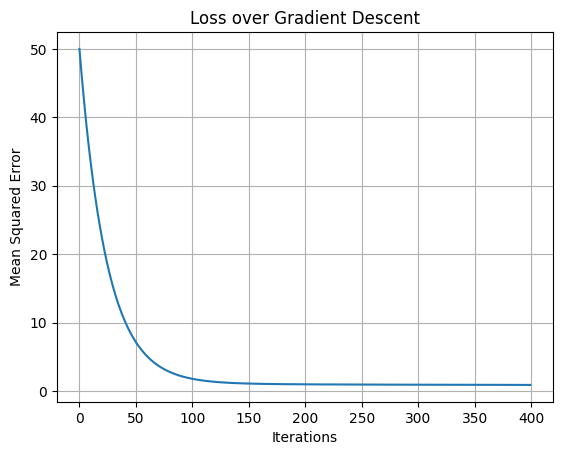

In [82]:
# Plot loss
RegressionUtils.plot_loss(model.loss_history)

In [83]:
predictions = model.predict(X)
predictions[:5]

array([[6.11807929],
       [9.82197616],
       [8.41594706],
       [7.55880907],
       [4.71332872]])

In [84]:
mse = RegressionUtils.mean_squared_error(y, predictions)
print("MSE:", mse)

accu = RegressionUtils.r2_score(y, predictions)
print("Accuracy:", accu)

MSE: 0.8832921917968494
Accuracy: 0.7473310444300556


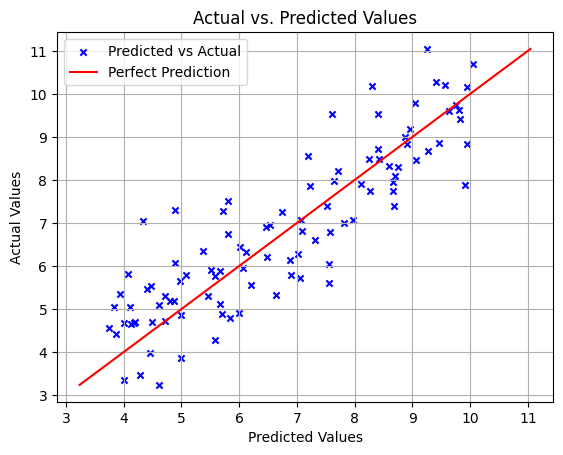

Prediction Correlation: 0.8771


In [85]:
# Plot predictions
RegressionUtils.plot_predictions(model, X, y)

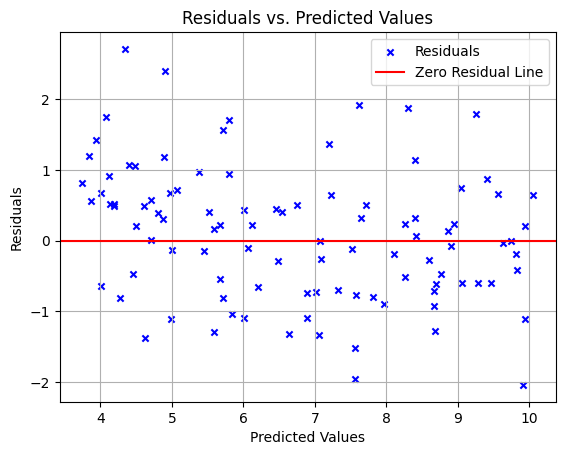

In [86]:
RegressionUtils.plot_residuals(model, X, y)

Linear Regression Real World Data Example

In [87]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [88]:
df = pd.read_csv("../../data/ds4400_spotify.csv")
df.head()

,song_title,artist_name,duration_ms,release_year,explicit,artist_pop,track_pop
0,Nights,Frank Ocean,307151,2016,True,87,78
1,Wonderwall,Oasis,258906,1995,False,78,70
2,Color Your Night,Lotus Juice,227240,2024,False,65,65
3,Bring Em Out,T.I.,216706,2004,True,75,61
4,It's ok I'm ok,Tate McRae,156521,2024,True,84,82


In [89]:
y = df['track_pop'].values
y = np.array([y]).T
y[:5]

array([[78],
       [70],
       [65],
       [61],
       [82]])

In [90]:
df_new = df.drop(columns=['song_title', 'artist_name'])
df_new = df_new.drop(columns=['track_pop'])
df_new.head()

,duration_ms,release_year,explicit,artist_pop
0,307151,2016,True,87
1,258906,1995,False,78
2,227240,2024,False,65
3,216706,2004,True,75
4,156521,2024,True,84


In [91]:
categorical_cols = ["explicit"]
df_new['explicit'] = df_new['explicit'].astype('category')

In [92]:
numeric_cols = ['duration_ms', 'artist_pop', 'release_year']

In [93]:
onehot_X = pd.get_dummies(df_new[categorical_cols], drop_first=True, dtype = int)
categorical_X = onehot_X.to_numpy()
categorical_X[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [94]:
numeric_X_scaled = preprocessing.scale(df_new[numeric_cols])
numeric_X_scaled[:5]

array([[ 0.70010333,  0.86398275,  0.22948468],
       [ 0.21383503,  0.36732201, -1.34949525],
       [-0.10533115, -0.35007684,  0.83100085],
       [-0.21150485,  0.20176843, -0.67278956],
       [-0.81811814,  0.69842917,  0.83100085]])

In [95]:
Phi = np.hstack([numeric_X_scaled, categorical_X])
Phi[:5]

array([[ 0.70010333,  0.86398275,  0.22948468,  1.        ],
       [ 0.21383503,  0.36732201, -1.34949525,  0.        ],
       [-0.10533115, -0.35007684,  0.83100085,  0.        ],
       [-0.21150485,  0.20176843, -0.67278956,  1.        ],
       [-0.81811814,  0.69842917,  0.83100085,  1.        ]])

In [96]:
# Train the model
model = LinearRegression(learning_rate=0.1, n_iters=400)
model.fit(Phi, y)

In [97]:
w = model.weights
w

array([[-0.99377435],
       [14.80654947],
       [ 1.81899331],
       [-1.46246571]])

In [98]:
b = model.bias
b

array([[61.75501693]])

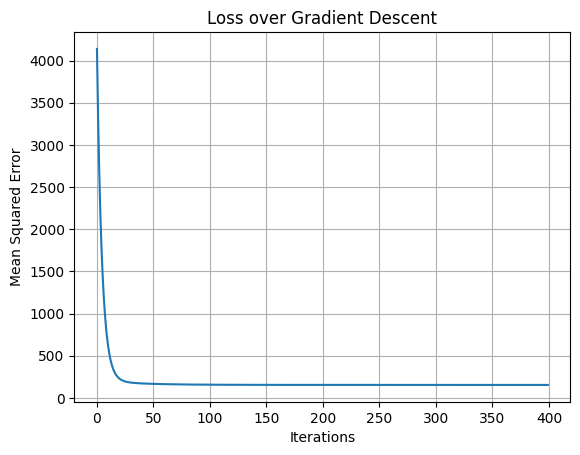

In [99]:
# Plot loss
RegressionUtils.plot_loss(model.loss_history)

In [100]:
predictions = model.predict(Phi)
predictions[:5]

array([[72.80684095],
       [64.52656182],
       [58.1878472 ],
       [62.2664338 ],
       [72.95848709]])

In [101]:
mse = RegressionUtils.mean_squared_error(y, predictions)
print("MSE:", mse)

accu = RegressionUtils.r2_score(y, predictions)
print("Accuracy:", accu)

MSE: 154.45488235257343
Accuracy: 0.5802756213685598


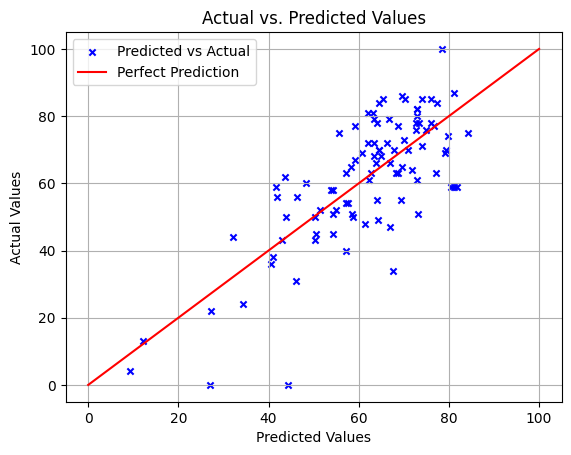

Prediction Correlation: 0.7618


In [102]:
# Plot predictions
RegressionUtils.plot_predictions(model, Phi, y)

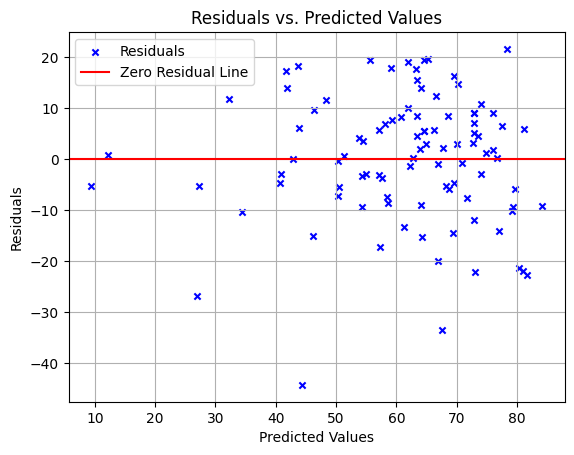

In [103]:
RegressionUtils.plot_residuals(model, Phi, y)

In [104]:
# Using Closed form solution

model.closed_form_solution(Phi, y)
w = model.weights
print(w)
b = model.bias
print(b)

[[-0.99417948]
 [14.80992468]
 [ 1.82334087]
 [-1.49938399]]
[61.76547741]


Polynomial Regression Example

In [121]:
# Polynomial Regression Example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data for polynomial regression
np.random.seed(42)
X_poly_sample = 6 * np.random.rand(100, 1) - 3  # Range from -3 to 3
y_poly_sample = 0.5 * X_poly_sample**2 + X_poly_sample + 2 + np.random.randn(100, 1)

# Transform features into polynomial form
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_transformed = poly.fit_transform(X_poly_sample)

# Train linear regression model on polynomial features
poly_model = LinearRegression(learning_rate=0.01, n_iters=500)
poly_model.fit(X_poly_transformed, y_poly_sample)

# Predictions
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)


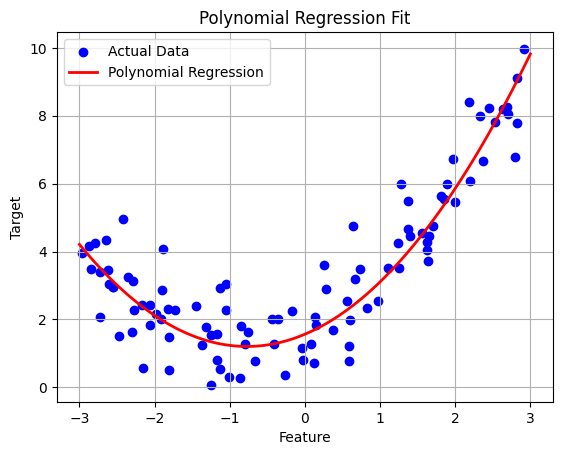

In [122]:
# Plot results
plt.scatter(X_poly_sample, y_poly_sample, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_poly, color='red', linewidth=2, label='Polynomial Regression')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

In [123]:
w = poly_model.weights
print(w)
b = poly_model.bias
print(b)

[[0.93556368]
 [0.60590006]]
[[1.56292621]]


Polynomial Regression MSE: 0.7968898657560399
Polynomial Regression Accuracy: 0.8487688722046429


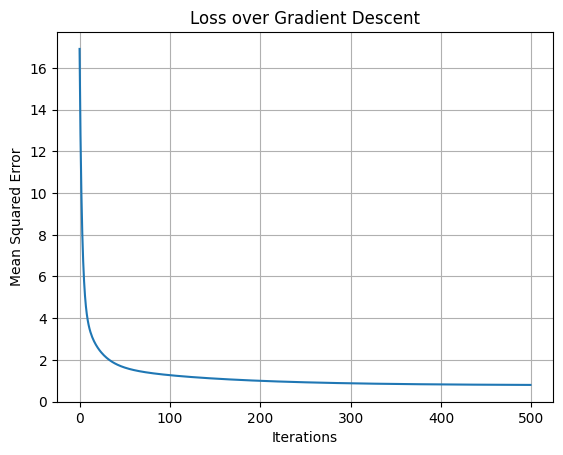

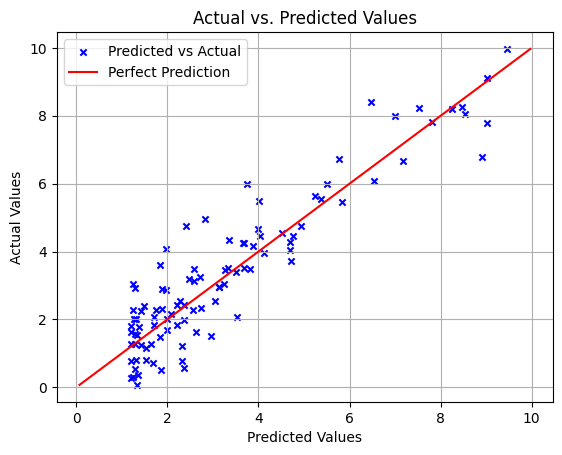

Prediction Correlation: 0.9226


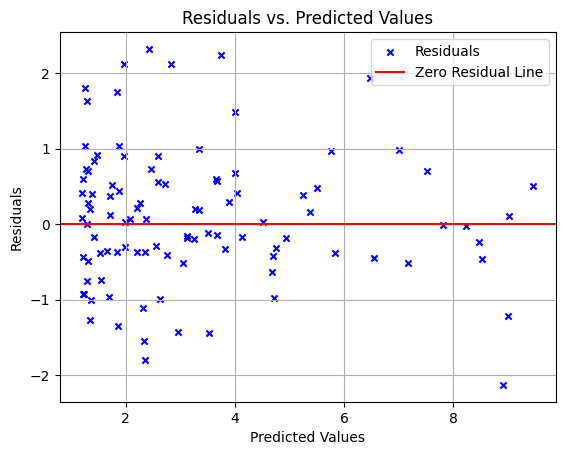

In [124]:
# Evaluate and visualize polynomial regression
mse_poly = RegressionUtils.mean_squared_error(y_poly_sample, poly_model.predict(X_poly_transformed))
accu_poly = RegressionUtils.r2_score(y_poly_sample, poly_model.predict(X_poly_transformed))

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression Accuracy:", accu_poly)

RegressionUtils.plot_loss(poly_model.loss_history)
RegressionUtils.plot_predictions(poly_model, X_poly_transformed, y_poly_sample)
RegressionUtils.plot_residuals(poly_model, X_poly_transformed, y_poly_sample)

In [ ]:
# Using Closed form solution
poly_model.closed_form_solution(X_poly_transformed, y_poly_sample)
w = poly_model.weights
print(w)
b = poly_model.bias
print(b)

[[0.93366893]
 [0.56456263]]
[1.78134581]
